# Importing data

In [36]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df.head(100)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [7]:
y = df['species']

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X.shape

(100, 4)

In [10]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

# Label Encoder 

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# Initialising Label encoder
encoder = LabelEncoder()

In [13]:
encoder.fit(y)

LabelEncoder()

In [15]:
encoder.transform(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
y_encoded = encoder.transform(y)

In [39]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
encoder.inverse_transform([0])

array(['Iris-setosa'], dtype=object)

# Model training

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# Initialise
model = LogisticRegression()

In [24]:
model.fit(X,y_encoded)

LogisticRegression()

My model is trained.

In [25]:
# Here is my intercept
model.intercept_

array([-6.64224829])

In [26]:
# Here is my slope
model.coef_

array([[ 0.44061796, -0.90161617,  2.31048433,  0.9677031 ]])

### Let's get the predictions

# For logistic regression - An explanation
When we will have more than 1 column

$$ \sigma(x) = \frac{1} {1 + e^{-(m{1}.x{1} + m{2}.x{2} + c)}} $$

In [44]:
# Our equation
m1 = 0.44061796
m2 = -0.90161617
m3 = 2.31048433
m4 = 0.9677031
c = -6.64224829

# My Linear regression equation will be 
sep_len = 6.2
sep_wid = 2.9
pet_len = 4.3
pet_wid = 1.3


In [45]:
# For my linear regression
(m1*sep_len) + (m2 * sep_wid) + (m3 * pet_len) + (m4 * pet_wid) + c

4.667992817999999

In [46]:
# Let's capture the out of our linear regression equation
output = (m1*sep_len) + (m2 * sep_wid) + (m3 * pet_len) + (m4 * pet_wid) + c

In [47]:
1/(1 + np.exp(-output))

0.9906962719730418

In [48]:
encoder.inverse_transform([1])

array(['Iris-versicolor'], dtype=object)

In [43]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


# Metrics

In [53]:
# These are my predictions
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
# Saving my predictions inside a variable
predictions = model.predict(X)

In [51]:
# These are my real values
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Accuracy 

In [52]:
from sklearn.metrics import accuracy_score

In [55]:
# Trying it out
accuracy_score(y_encoded,predictions)

1.0

# Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix

In [60]:
# Trying it out
confusion_matrix(y_encoded, predictions)

array([[50,  0],
       [ 0, 50]])

In [61]:
# Storing inside a variable
cm = confusion_matrix(y_encoded, predictions)

### Plotting the confusion matrix

In [69]:
import seaborn as sns

<Axes: >

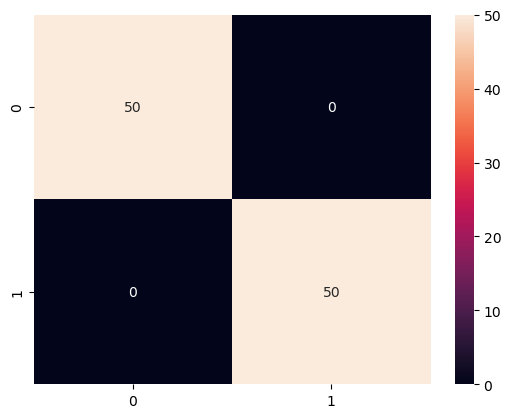

In [70]:
sns.heatmap(cm, annot=True)

# Confusion matrix for your reference

In [66]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)

<Axes: >

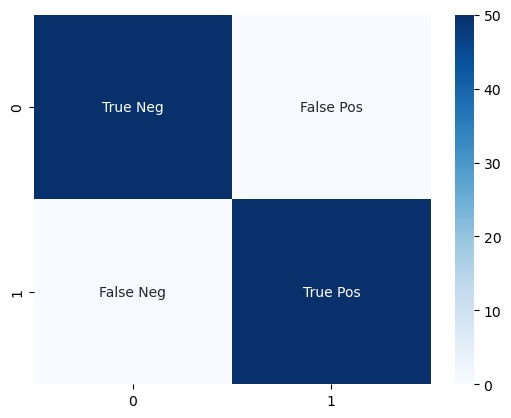

In [67]:
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# Precision 

In [71]:
from sklearn.metrics import precision_score

In [72]:
precision_score(y_encoded,predictions)

1.0

# Recall 

In [73]:
from sklearn.metrics import recall_score

In [74]:
recall_score(y_encoded,predictions)

1.0

# F1 Score 

2 * (precision * recall) / (precision + recall)

In [75]:
from sklearn.metrics import f1_score

In [76]:
f1_score(y_encoded,predictions)

1.0